In [50]:
# VISUALIZATIONS

# Dependencies and Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from pypfopt import expected_returns, EfficientSemivariance
from pypfopt.base_optimizer import BaseConvexOptimizer
from pypfopt.objective_functions import ex_post_tracking_error
# from pypfopt import plotting
from pypfopt import EfficientFrontier, risk_models, expected_returns
import os
import json
from collections import Counter

In [14]:
# Cleaned Weights and Expected Returns Series
with open('data/cleaned_weights.pkl', 'rb') as f:
    cleaned_weights = pickle.load(f)

# with open('expected_returns_series.pkl', 'rb') as f:
#     expected_returns_series = pickle.load(f)

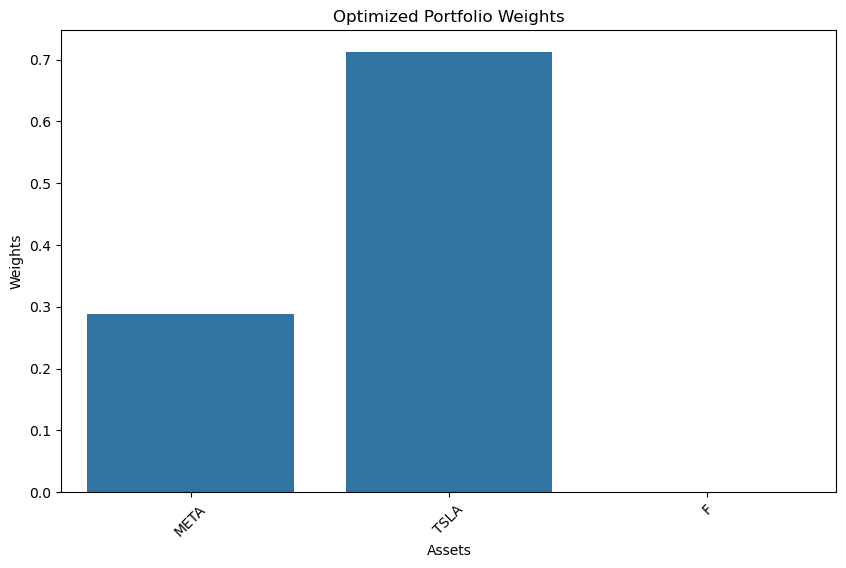

In [33]:
# Optimized Portfolio Weights
plt.figure(figsize=(10, 6))
sns.barplot(x=list(cleaned_weights.keys()), y=list(cleaned_weights.values()))
plt.title('Optimized Portfolio Weights')
plt.xlabel('Assets')
plt.ylabel('Weights')
plt.xticks(rotation=45)
plt.grid(False)
figname = "images/OptimizedPortfolioWeights.png"
plt.savefig(figname)
plt.show()

In [35]:
all_data = pd.read_pickle('data/all_data.pkl')

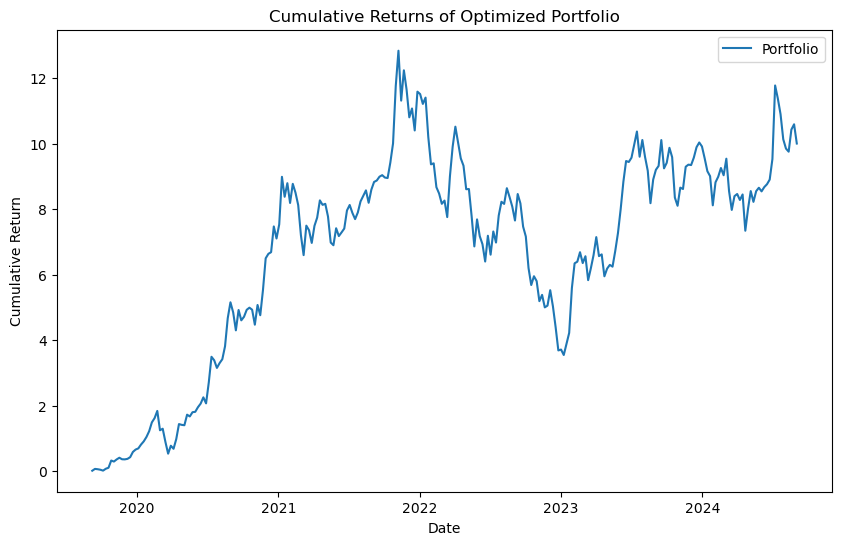

In [37]:
# Cumulative Portfolio Returns
def calculate_portfolio_cumulative_returns(weights, returns_df):
    portfolio_returns = (returns_df * weights).sum(axis=1)
    cumulative_returns = (1 + portfolio_returns).cumprod() - 1
    return cumulative_returns

cumulative_returns = calculate_portfolio_cumulative_returns(cleaned_weights, all_data)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Portfolio')
plt.title('Cumulative Returns of Optimized Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(False)
plt.legend()
figname = "images/CumulativeReturnsOptimized.png"
plt.savefig(figname)
plt.show()

c:\Users\16023\anaconda3\envs\algotrading\lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


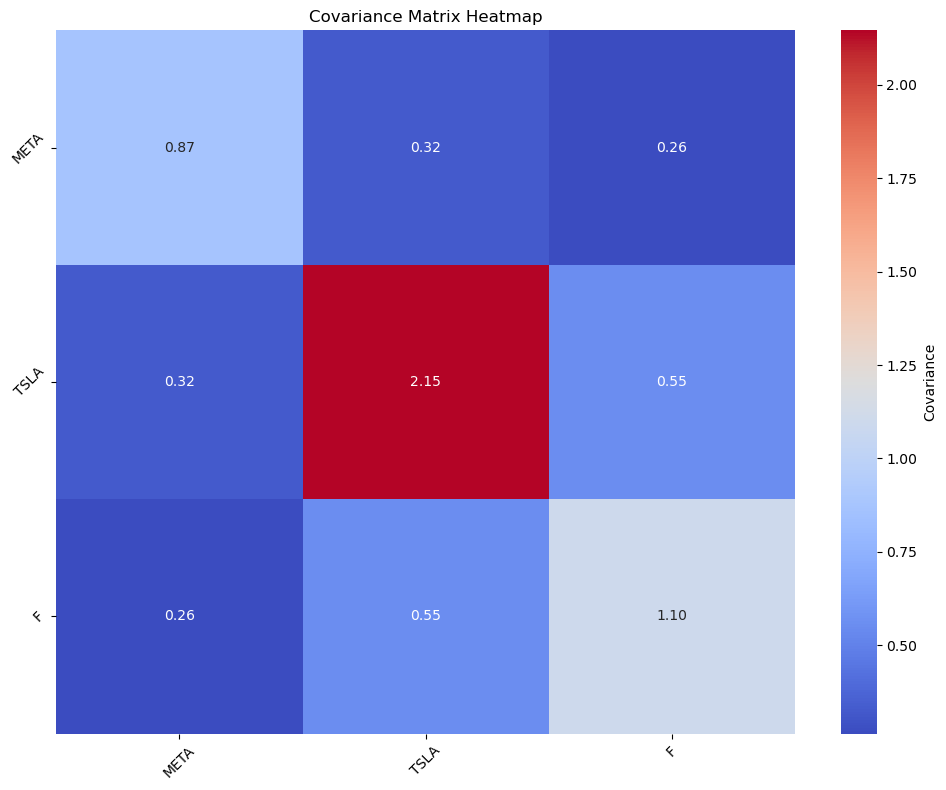

In [38]:
# Covariance Matrix
cov_matrix = risk_models.risk_matrix(all_data, returns_data=True, method='ledoit_wolf')

# Converting the covariance matrix to a DataFrame for better visualization
cov_matrix_df = pd.DataFrame(cov_matrix, index=all_data.columns, columns=all_data.columns)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix_df, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Covariance'})
plt.title('Covariance Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
figname = "images/CovarianceHeatMap.png"
plt.savefig(figname)
plt.show()

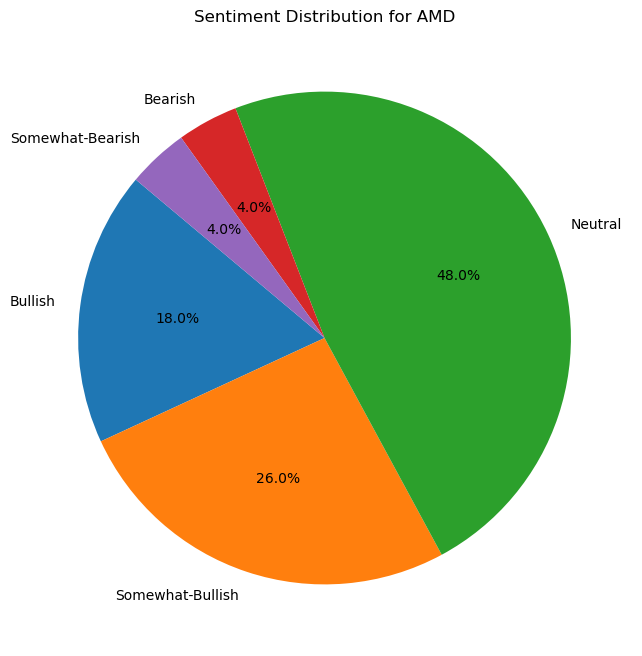

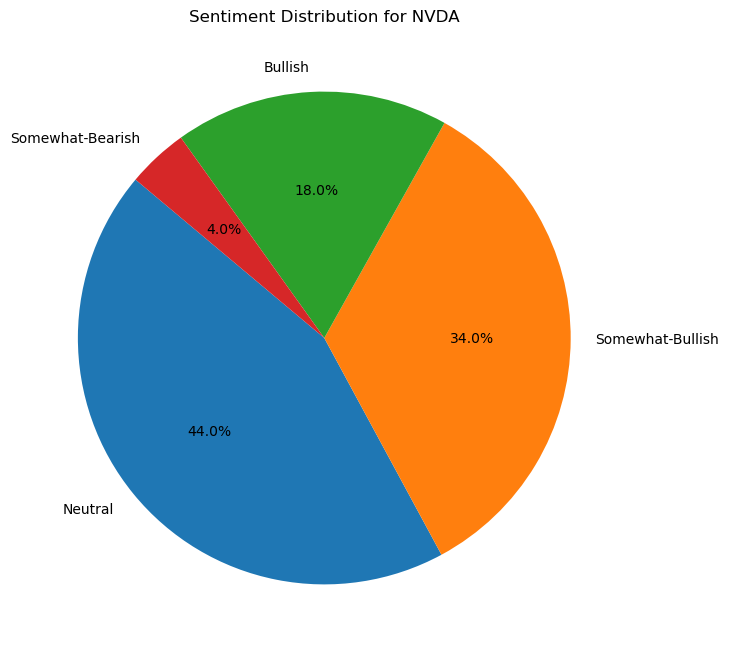

In [51]:
# Open the file for reading
if os.path.isfile("data/sentiments.json"):        
    with open("data/sentiments.json", "r") as sf:
        # Load the dictionary from the file
        sentiments = json.load(sf)
    
    
    # Function to create a pie chart
    def create_pie_chart(symbol, sentiment_list):
        sentiment_counts = Counter(sentiment_list)
        labels = sentiment_counts.keys()
        sizes = sentiment_counts.values()
    
        plt.figure(figsize=(8, 8))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f'Sentiment Distribution for {symbol}')
        figname = "images/" + symbol + "_SentimentVisual.png"
        plt.savefig(figname)
        plt.show()
    
    
    
    # Generate pie charts for each stock symbol
    for symbol, sentiment_list in sentiments.items():
        create_pie_chart(symbol, sentiment_list)